<a href="https://colab.research.google.com/github/kunalavghade/Ai/blob/main/Week_14_%E2%80%94_Attention_Mechanism_(Before_Transformers).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 14 — Attention Mechanism (Before Transformers)

## Goal

Understand why attention was introduced and how it fixes limitations of RNNs.

By the end of this week, you should:
- Understand the bottleneck problem in RNNs
- Implement basic attention mechanism
- Understand Query, Key, Value
- Implement scaled dot-product attention
- Visualize attention weights

This week transitions from recurrence → attention.

---

# 1. The Bottleneck Problem in RNNs

In sequence-to-sequence RNN:

Encoder:
- Compresses entire input sequence into single vector

Decoder:
- Uses that single vector to generate output

Problem:
Long sequences → information loss.

This fixed-size context vector becomes bottleneck.

---

# 2. Core Idea of Attention

Instead of compressing everything into one vector:

Allow model to:
- Look back at all encoder states
- Decide what to focus on dynamically

Attention is:
- Learnable weighted averaging
- Content-based memory lookup

---

# 3. Basic Attention Formula

Given:
- Query (Q)
- Keys (K)
- Values (V)

Attention:

Attention(Q, K, V) =
    softmax(QKᵀ / √d_k) V

Steps:
1. Compute similarity scores: QKᵀ
2. Scale by √d_k
3. Apply softmax
4. Weighted sum of V

---

# 4. Intuition Behind Q, K, V

Query:
- What we are looking for

Key:
- What each memory position represents

Value:
- Information stored at each position

Attention:
- Matches query with keys
- Retrieves relevant values

---

# 5. Why Scaling by √d_k?

Without scaling:
- Dot products grow large
- Softmax becomes sharp
- Gradients become unstable

Scaling stabilizes gradients.

---

# 6. Self-Attention

When:
Q = K = V

Each token:
- Attends to every other token

This enables:
- Long-range dependency modeling
- Parallel computation

---

# 7. Attention vs RNN

RNN:
- Sequential
- O(T) depth

Attention:
- Parallel
- Direct connections between tokens
- O(1) path length between tokens

Major advantage:
Better long-range dependency learning.

---

# Coding Exercises

## Question 1: Implement Basic Dot-Product Attention

Given:
- Q (batch × seq_len × d)
- K (batch × seq_len × d)
- V (batch × seq_len × d)

Implement:
- QKᵀ
- Scaling
- Softmax
- Multiply by V

Test on:
- Random tensors
- Verify shape correctness

---

## Question 2: Visualize Attention Weights

Create:
- Small synthetic sequence
- Compute attention matrix
- Plot heatmap

Interpret:
- Which tokens attend to which?

---

## Question 3: Implement Masked Attention

For autoregressive setting:
- Prevent attending to future tokens

Implement:
- Upper triangular mask
- Apply before softmax

---

## Question 4: Replace RNN Decoder with Attention Layer

Experiment:
- Compare training stability
- Compare convergence speed

---

## Question 5: Complexity Analysis

Compute:
- Time complexity of RNN
- Time complexity of attention
- Memory usage comparison

---

# Conceptual Questions

1. Why does attention remove RNN bottleneck?
2. Why is attention parallelizable?
3. Why does self-attention capture long-range dependencies better?
4. Why does attention scale as O(n²)?
5. What problem does masking solve?

---

# Outcome of Week 14

After this week, you should:
- Implement attention from scratch
- Understand Q/K/V deeply
- Explain why Transformers replaced RNNs
- Be ready for full Transformer architecture

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
def softmax(x, axis=1):
  x = x - np.max(x, axis=axis, keepdims=True)
  exp = np.exp(x)
  return exp / np.sum(exp, axis=axis, keepdims=True)

# Scaled Dot-Product Attention

This is the core computation used in Transformers.

------------------------------------------------------------
Formula
------------------------------------------------------------

Attention(Q, K, V) = softmax( (Q K^T) / sqrt(d_k) ) V

------------------------------------------------------------
Step-by-Step Breakdown
------------------------------------------------------------

1) Compute similarity scores:

S = Q K^T

• Q → Query matrix
• K → Key matrix
• Q K^T → dot-product similarity
• Shape: (seq_len_q × seq_len_k)

Each query compares itself with every key.

------------------------------------------------------------
2) Scale the scores:

S_scaled = S / sqrt(d_k)

• d_k → dimension of key vectors
• Scaling prevents large dot products
• Keeps softmax gradients stable

Without scaling:
Large d_k → large dot products → softmax saturation → vanishing gradients

------------------------------------------------------------
3) Apply Softmax:

A = softmax(S_scaled)

• Converts scores into probabilities
• Each row sums to 1
• Represents attention weights

Now each query has a distribution over all keys.

------------------------------------------------------------
4) Weighted sum of values:

Output = A V

• V → Value matrix
• Final output = weighted combination of values
• Shape: (seq_len_q × d_v)

------------------------------------------------------------
Intuition
------------------------------------------------------------

Query asks: “What am I looking for?”
Key says: “What do I contain?”
Value says: “Here is the information.”

Attention does:

1) Compare query with all keys
2) Turn similarity into weights
3) Use weights to mix values

------------------------------------------------------------
Why Divide by sqrt(d_k)?
------------------------------------------------------------

Variance of dot product grows with dimension.

If:

Var(Q_i) = 1
Var(K_i) = 1

Then:

Var(Q · K) ≈ d_k

So we normalize by sqrt(d_k)
to keep variance ≈ 1.

------------------------------------------------------------
Matrix View
------------------------------------------------------------

Q: (n × d_k)
K: (m × d_k)
V: (m × d_v)

Q K^T → (n × m)
softmax → (n × m)
Result → (n × d_v)

------------------------------------------------------------
Core Insight
------------------------------------------------------------

Attention = weighted averaging,
where weights are learned dynamically
based on similarity.

------------------------------------------------------------

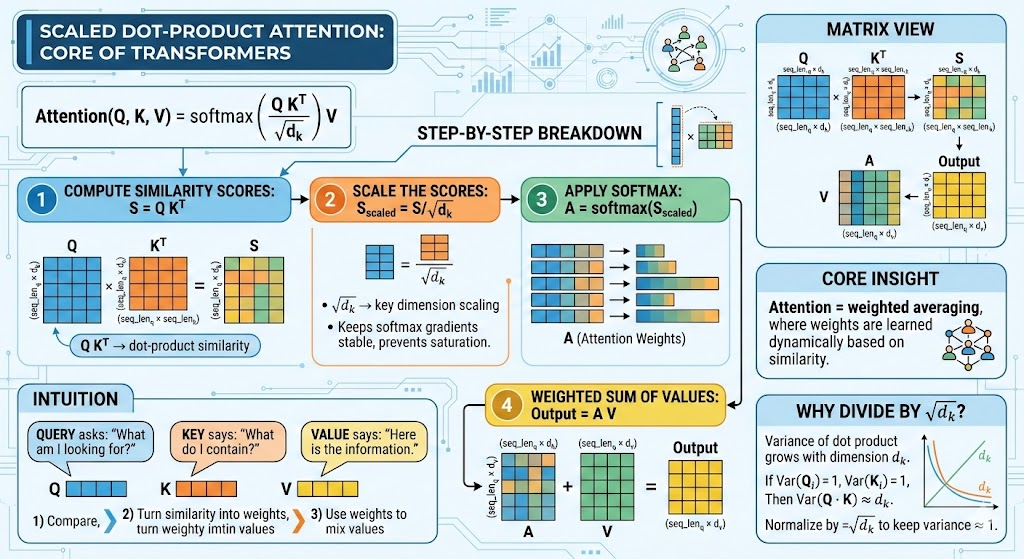

In [4]:
def scaled_dot_product_attention(Q, K, V):
  """
  Q, K, V: (batch, seq_len, d)
  """
  d_k = Q.shape[-1]

  # 1. Similarity scores
  scores = np.matmul(Q, K.transpose(0, 2, 1)) # (batch, seq, seq)

  # 2. Scaling
  scores = scores / np.sqrt(d_k)

  # 3. Softmax
  weights = softmax(scores, axis=1)

  # 4. Weighted sum
  output = np.matmul(weights, V)

  return output, weights

Test Shape Correctness

In [5]:
batch, seq_len, d = 2, 4, 8

Q = np.random.randn(batch, seq_len, d)
K = np.random.randn(batch, seq_len, d)
V = np.random.randn(batch, seq_len, d)

output, weights = scaled_dot_product_attention(Q, K, V)

print("Output shape:", output.shape)
print("Weights shape:", weights.shape)

Output shape: (2, 4, 8)
Weights shape: (2, 4, 4)


**Question 2 — Visualize Attention Weights**

Synthetic Example

In [6]:
tokens = ["I", "love", "deep", "learning"]
seq_len = len(tokens)
d = 6

Q = np.random.randn(1, seq_len, d)
K = np.random.randn(1, seq_len, d)
V = np.random.randn(1, seq_len, d)

output, weights = scaled_dot_product_attention(Q, K, V)

Heatmap Visualization

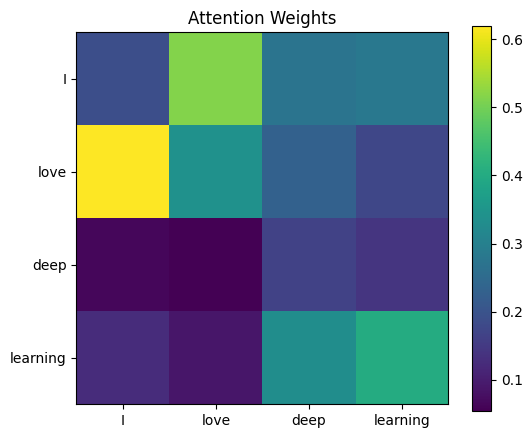

In [7]:
plt.figure(figsize=(6,5))
plt.imshow(weights[0], cmap='viridis')
plt.xticks(range(seq_len), tokens)
plt.yticks(range(seq_len), tokens)
plt.colorbar()
plt.title("Attention Weights")
plt.show()

Question 3 — Masked (Causal) Attention

Create Causal Mask

In [8]:
def create_casual_mask(seq_len):
  return np.triu(np.ones((seq_len, seq_len)), k=1)

Apply Mask

In [11]:
def masked_scaled_attention(Q, K, V):
  d_k = Q.shape[-1]
  scores = np.matmul(Q, K.transpose(0,2,1)) / np.sqrt(d_k)

  mask = create_casual_mask(scores.shape[-1])

  scores = scores - 1e9 * mask

  weights = softmax(scores, axis=1)

  output = np.matmul(weights, V)

  return output, weights

Visualize Masked Attention

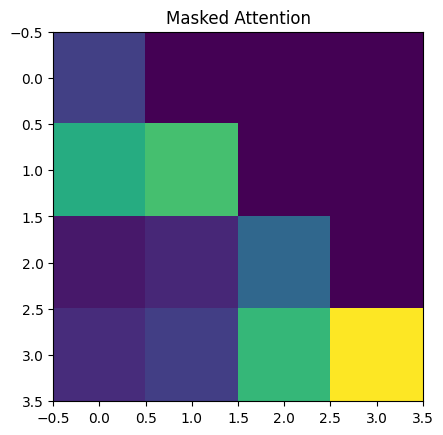

In [12]:
output_masked, weights_masked = masked_scaled_attention(Q, K, V)

plt.imshow(weights_masked[0], cmap='viridis')
plt.title("Masked Attention")
plt.show()

Core Attention Function

In [17]:
def scaled_dot_product_attention(Q, K, V, mask=None):
    """
    Q, K, V shape: (batch, seq_len, d)
    """
    d_k = Q.shape[-1]

    # Step 1: Similarity scores
    scores = np.matmul(Q, K.transpose(0,2,1))  # (batch, seq, seq)

    # Step 2: Scaling
    scores = scores / np.sqrt(d_k)

    # Step 3: Apply mask (if any)
    if mask is not None:
        scores = scores - 1e9 * mask

    # Step 4: Softmax
    weights = softmax(scores, axis=-1)

    # Step 5: Weighted sum
    output = np.matmul(weights, V)

    return output, weights

Self-Attention Layer

In [16]:
class SelfAttention:
    def __init__(self, embed_dim):
        self.embed_dim = embed_dim

        # Linear projections for Q, K, V
        self.Wq = np.random.randn(embed_dim, embed_dim) * 0.1
        self.Wk = np.random.randn(embed_dim, embed_dim) * 0.1
        self.Wv = np.random.randn(embed_dim, embed_dim) * 0.1

    def forward(self, x, masked=False):
        """
        x: (batch, seq_len, embed_dim)
        """
        Q = np.matmul(x, self.Wq)
        K = np.matmul(x, self.Wk)
        V = np.matmul(x, self.Wv)

        mask = None
        if masked:
            seq_len = x.shape[1]
            mask = create_casual_mask(seq_len)

        output, weights = scaled_dot_product_attention(Q, K, V, mask)
        return output, weights

Synthetic Example

In [18]:
tokens = ["I", "love", "deep", "learning"]
seq_len = len(tokens)
embed_dim = 8
batch = 1

# Random embeddings for tokens
x = np.random.randn(batch, seq_len, embed_dim)

# Initialize attention layer
attention = SelfAttention(embed_dim)

# Forward pass (self-attention)
output, weights = attention.forward(x, masked=False)

print("Output shape:", output.shape)
print("Attention weights shape:", weights.shape)

Output shape: (1, 4, 8)
Attention weights shape: (1, 4, 4)


Visualize Attention

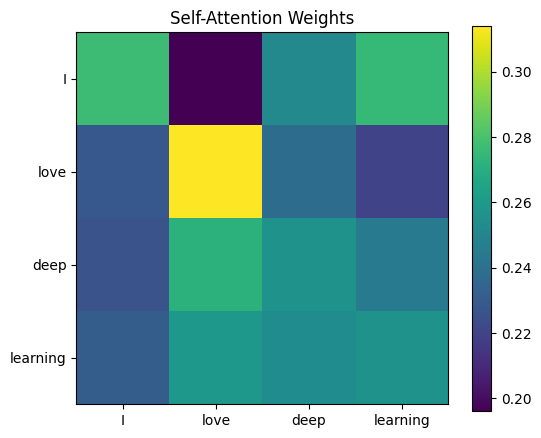

In [19]:
plt.figure(figsize=(6,5))
plt.imshow(weights[0], cmap='viridis')
plt.xticks(range(seq_len), tokens)
plt.yticks(range(seq_len), tokens)
plt.title("Self-Attention Weights")
plt.colorbar()
plt.show()

Masked Attention Example

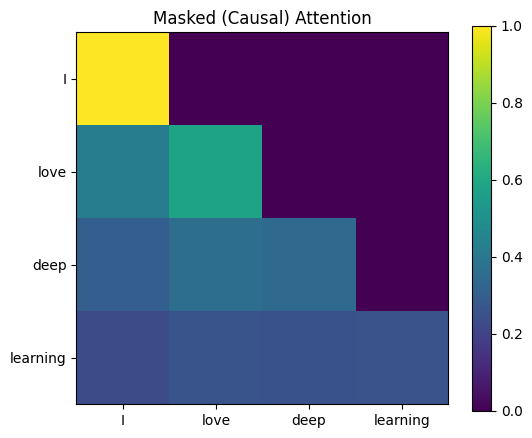

In [20]:
output_masked, weights_masked = attention.forward(x, masked=True)

plt.figure(figsize=(6,5))
plt.imshow(weights_masked[0], cmap='viridis')
plt.xticks(range(seq_len), tokens)
plt.yticks(range(seq_len), tokens)
plt.title("Masked (Causal) Attention")
plt.colorbar()
plt.show()